<a href="https://colab.research.google.com/github/niduttnb/Multimodal-Image-Retrieval/blob/main/Inference_Image_Caption%2BSimilaity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Implementation

In [1]:
!pip install -q sentence-transformers

     |████████████████████████████████| 79 kB 3.0 MB/s 
     |████████████████████████████████| 4.0 MB 11.1 MB/s 
     |████████████████████████████████| 1.2 MB 7.9 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 596 kB 53.6 MB/s 
     |████████████████████████████████| 6.6 MB 51.9 MB/s 
     |████████████████████████████████| 880 kB 50.6 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

**First i shall run inference on results of Show, Attend and tell architecture. The generated CSV files are the captions generated by Show-Attend-And-Tell on the test set.**

In [4]:
df_test = pd.read_csv("/content/drive/MyDrive/Masters/Deep Learning/Dataset/flickr30k_images/Saved Model/valid_df_attention.csv")
df_test.head()

,Unnamed: 0,image,caption
0,0,6161478369.jpg,Two men and one woman are performing on stage ...
1,1,4970631613.jpg,A woman wearing an elaborate array of feathers...
2,2,2678171436.jpg,A bird 's eye view of a man in a white shirt w...
3,3,3091962081.jpg,The man is dressed in black and smiling while ...
4,4,4176576400.jpg,A man sitting on a lawn chair is carrying an i...


In [5]:
model = SentenceTransformer('bert-base-nli-mean-tokens')
df_attention = df_test.reset_index(drop = True)
df_attention = df_test[["image","caption"]]
"""caption = model.encode(df_test["caption"])
print(caption.shape)
with open('caption_clean.pickle','wb')  as handle:
    pickle.dump(caption, handle, protocol=pickle.HIGHEST_PROTOCOL)"""

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

'caption = model.encode(df_test["caption"])\nprint(caption.shape)\nwith open(\'caption_clean.pickle\',\'wb\')  as handle:\n    pickle.dump(caption, handle, protocol=pickle.HIGHEST_PROTOCOL)'

In [8]:
with open('/content/drive/MyDrive/Masters/Deep Learning/Dataset/flickr30k_images/Saved Model/caption_attention.pickle', 'rb') as handle:
      caption = pickle.load(handle)
model = SentenceTransformer('bert-base-nli-mean-tokens')
def inference_attention(query,caption,model):

  #Encode to 768 dimensions
  query = model.encode(query)
  sim =cosine_similarity([query],caption[:])
  images = []
  sim_ind = np.argsort(sim[0])[::-1]
  sim_ind = sim_ind[:9]

  def get_image_id(ix):
    return df_attention['image'].loc[[ix]].values[0]

  best_image = list(map(get_image_id,sim_ind))
  path = '/content/drive/MyDrive/Masters/Deep Learning/Dataset/flickr30k_images/flickr30k_images/'
  _, axes = plt.subplots(3, 3, figsize=(10, 10))
  print(best_image)
  for match, ax in zip(best_image, axes.flatten()):
      image = cv2.imread(f"{path}/{match}")
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      ax.imshow(image)
      ax.axis("off")

  plt.show()


['1572286502.jpg', '2636514498.jpg', '33064663.jpg', '5843047066.jpg', '4446088471.jpg', '2972864304.jpg', '1227655020.jpg', '3846534355.jpg', '2706068775.jpg']


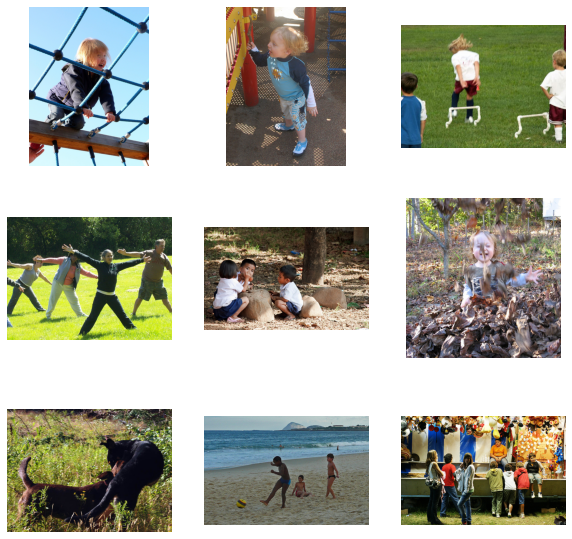

In [9]:
inference_attention('Children playing in Park',caption,model)

['74916401.jpg', '4329176590.jpg', '5249006378.jpg', '7027883609.jpg', '2390286467.jpg', '7684654986.jpg', '4329182834.jpg', '3288173388.jpg', '3240570205.jpg']


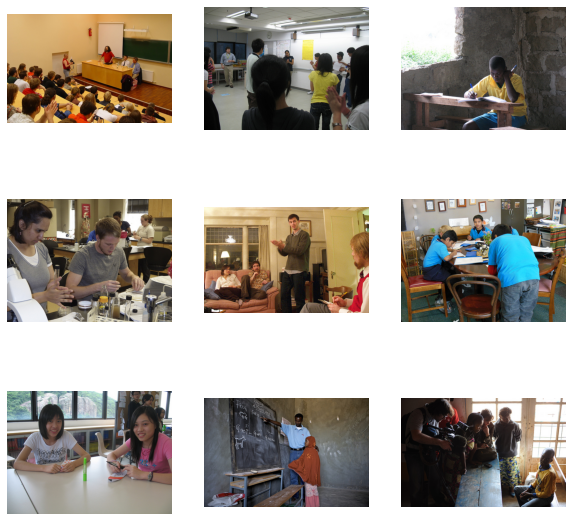

In [10]:
inference_attention('Professor Teaching in class',caption,model)

['390892763.jpg', '7936399880.jpg', '4614813437.jpg', '1733590931.jpg', '48908313.jpg', '8173029395.jpg', '2519585357.jpg', '3826376965.jpg', '3371224046.jpg']


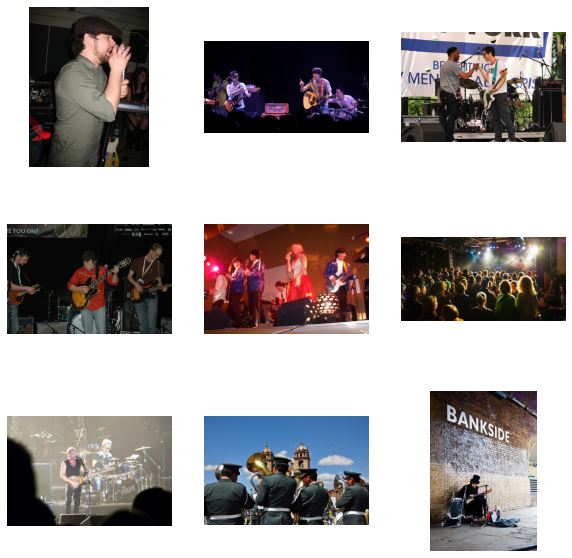

In [11]:
inference_attention('Concert',caption,model)

**First i shall run inference on results of Show and tell architecture. The generated CSV files are the captions generated by Show-And-Tell on the test set. It is expected that here the results are a bit off then the previous one**

In [34]:
show_tell_caption = pd.read_csv("/content/drive/MyDrive/Masters/Deep Learning/Dataset/flickr30k_images/Saved Model/show_tell_caption.csv")

In [35]:
model = SentenceTransformer('bert-base-nli-mean-tokens')
show_tell_caption = show_tell_caption[["image","caption"]]
caption = model.encode(show_tell_caption["caption"])

with open('/content/drive/MyDrive/Masters/Deep Learning/Dataset/flickr30k_images/Saved Model/show_tell.pickle','wb')  as handle:
    pickle.dump(caption, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [37]:
with open('/content/drive/MyDrive/Masters/Deep Learning/Dataset/flickr30k_images/Saved Model/show_tell.pickle', 'rb') as handle:
      caption = pickle.load(handle)
model = SentenceTransformer('bert-base-nli-mean-tokens')


['1572286502.jpg', '2636514498.jpg', '33064663.jpg', '5843047066.jpg', '4446088471.jpg', '2972864304.jpg', '1227655020.jpg', '3759492488.jpg', '3846534355.jpg']


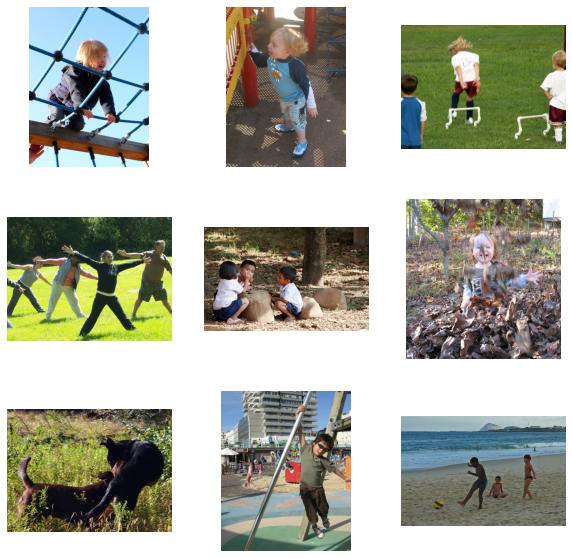

In [38]:
inference_attention('Children playing in Park',caption,model)

['74916401.jpg', '4329176590.jpg', '5249006378.jpg', '7027883609.jpg', '7684654986.jpg', '2390286467.jpg', '4329182834.jpg', '3288173388.jpg', '3240570205.jpg']


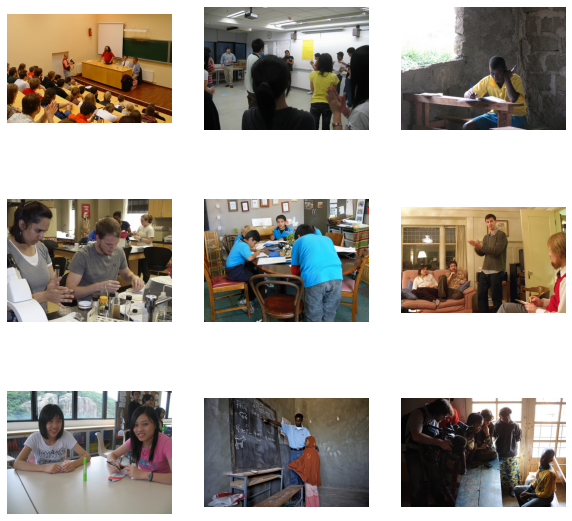

In [39]:
inference_attention('Professor Teaching in class',caption,model)

['390892763.jpg', '7936399880.jpg', '4614813437.jpg', '1733590931.jpg', '2519585357.jpg', '8173029395.jpg', '48908313.jpg', '3826376965.jpg', '5415557808.jpg']


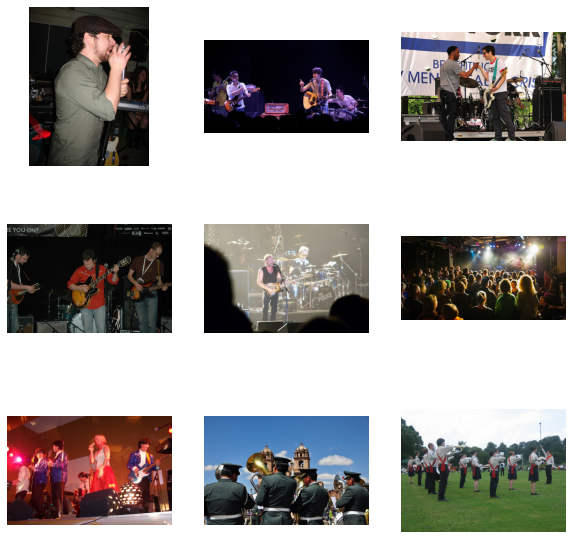

In [40]:
inference_attention('Concert',caption,model)